In [1]:
#Köksal Kapucuoğlu
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
#import any other non-machine learning modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
df1 = pd.read_csv("train1.csv")
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [2]:
#By printing a dataframe, you can view the data in csv format
print(df1) # x1 and x2 are features and y is label.


           x1        x2  y
0   -0.260234  2.767817  0
1    3.466190  6.054691  1
2   -2.036224  4.491902  0
3    2.434426  6.638656  1
4   -0.541338  3.210246  0
..        ...       ... ..
195  1.832132  6.247191  1
196  1.215533  5.750448  1
197 -0.464053  3.034393  0
198  2.638937  5.043589  1
199 -0.439450  3.853694  0

[200 rows x 3 columns]


In [3]:
#You can extract keys from dataframe, which you can use to extract features or labels.
print(df1.keys())
df1_x1 = df1['x1']
df1_x2 = df1['x2']
#To extract data as numpy array:
df1_numpy = df1.values
#You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df1['x1'].values

Index(['x1', 'x2', 'y'], dtype='object')


In [4]:
#Get feautures and label from train
X1 = pd.DataFrame(df1, columns = ['x1', 'x2']) #features of train 1
y1 = pd.DataFrame(df1, columns = ['y']) #labels of train 1

X2 = pd.DataFrame(df2, columns = ['x1', 'x2']) #features of train 2
y2 = pd.DataFrame(df2, columns = ['y']) #labels of train 2

In [5]:
N1 = df1.shape[0] # samples number of train 1
N2 = df2.shape[0] # samples number of train 2
print("samples of train 1:", N1)
print("samples of train 2:", N2)

samples of train 1: 200
samples of train 2: 1600


In [6]:
def calculatevariance(Xi,N): #Xi =  i.th feature column, N = number of samples
    Xim = np.average(Xi) #get mean, same function as np.mean(Xi, axis=0)
    var = 0.0
    for i in np.arange(0, N):
        var = ((Xi[i] - Xim)**2) + var
    return  (1./(N))*var

def calculatecovariance(Xi, Xk, N):#Xi =  i.th feature column, Xk =  k.th feature column, N = number of samples
    Xim=np.average(Xi) 
    Xkm=np.average(Xk)
    cov = 0.0
    for i in np.arange(0, N):
        cov = (Xi[i]-Xim)*(Xk[i]-Xkm) + cov
    return  (1./(N))*cov

In [7]:
#Calculate variance for train 1
#x1 = feature 1 name at train 1
#x2 = feature 2 name at train 1
print("variance of x1 = ", calculatevariance(X1["x1"], N1))
print("variance of x2 = ", calculatevariance(X1["x2"], N1))
print("covariance of x2-x1 = ", calculatecovariance(X1["x1"],X1["x2"], N1))
print("covariance of x1-x2 = ", calculatecovariance(X1["x2"],X1["x1"], N1))

variance of x1 =  3.3855708883556024
variance of x2 =  4.3332719522337
covariance of x2-x1 =  1.8767961296565006
covariance of x1-x2 =  1.8767961296565006


In [8]:
print("Calcutating covariance matrix for train 1")
varx1 = calculatevariance(X1["x1"], N1)
varx2 = calculatevariance(X1["x2"], N1)
covx1x2 = calculatecovariance(X1["x1"],X1["x2"], N1)
covx2x1 = calculatecovariance(X1["x2"],X1["x1"], N1)
print("***************************")
cov_mtrx1 = [[varx1,covx1x2],[covx2x1,varx2]]
print(cov_mtrx1)

print("***************************")
print("Calcutating covariance matrix for train 2")
varx1 = calculatevariance(X2["x1"], N2)
varx2 = calculatevariance(X2["x2"], N2)
covx1x2 = calculatecovariance(X2["x1"],X2["x2"], N2)
covx2x1 = calculatecovariance(X2["x2"],X2["x1"], N2)
cov_mtrx2 = [[varx1,covx1x2],[covx2x1,varx2]]
print(cov_mtrx2)

Calcutating covariance matrix for train 1
***************************
[[3.3855708883556024, 1.8767961296565006], [1.8767961296565006, 4.3332719522337]]
***************************
Calcutating covariance matrix for train 2
[[2.5099318410164977, 1.5566090465564741], [1.5566090465564741, 5.136920249849792]]


## Part A: Examine training sets

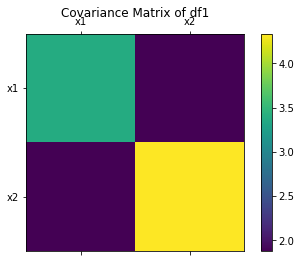

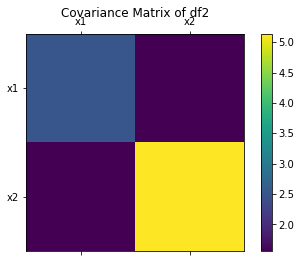

In [9]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title("Covariance Matrix of df1")
plt.show()

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx2,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title("Covariance Matrix of df2")
plt.show()
#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')

# Yorumları buraya ekle
# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

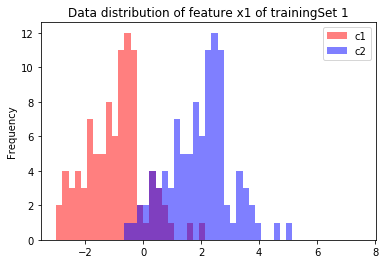

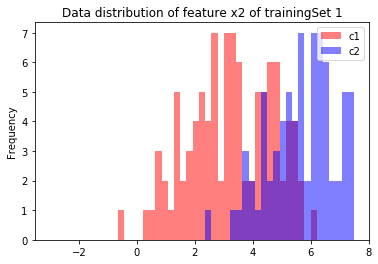

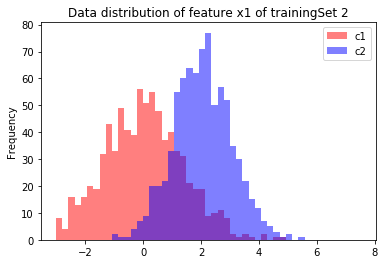

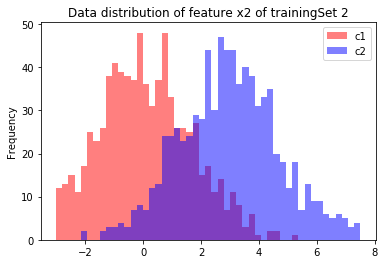

In [10]:
df1_c1 = df1[df1['y']==0] #get class1 for train1
df1_c2 = df1[df1['y']==1] #get class2 for train1
df2_c1 = df2[df2['y']==0] #get class1 for train2
df2_c2 = df2[df2['y']==1] #get class1 for train2

bins = np.linspace(-3, 7.5)
plt.hist(df1_c1["x1"], bins, alpha=0.5, label='c1',color = 'r')
plt.hist(df1_c2["x1"], bins, alpha=0.5, label='c2', color='b')
plt.gca().set(title='Data distribution of feature x1 of trainingSet 1', ylabel='Frequency')
plt.legend(loc='upper right')
plt.show()

plt.hist(df1_c1["x2"], bins, alpha=0.5, label='c1', color="r")
plt.hist(df1_c2["x2"], bins, alpha=0.5, label='c2', color="b")
plt.gca().set(title='Data distribution of feature x2 of trainingSet 1', ylabel='Frequency')
plt.legend(loc='upper right')
plt.show()

plt.hist(df2_c1["x1"], bins, alpha=0.5, label='c1', color="r")
plt.hist(df2_c2["x1"], bins, alpha=0.5, label='c2', color="b")
plt.gca().set(title='Data distribution of feature x1 of trainingSet 2', ylabel='Frequency')
plt.legend(loc='upper right')
plt.show()

plt.hist(df2_c1["x2"], bins, alpha=0.5, label='c1', color="r")
plt.hist(df2_c2["x2"], bins, alpha=0.5, label='c2', color="b")
plt.gca().set(title='Data distribution of feature x2 of trainingSet 2', ylabel='Frequency')
#plt.title("Histogram of x2 feature at df2")
plt.legend(loc='upper right')
plt.show()

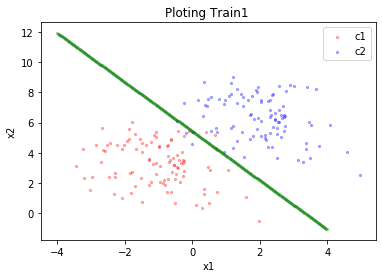

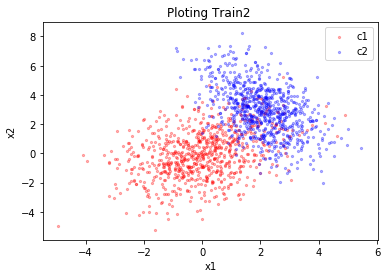

'\nx1 = np.arange(-4,4,0.02)\n#x21 = np.arange(-0.1,2,0.02)\n#0 = -3.30*x11 -2.03*x21\na*x1 + b*x2 = c\nx2 = (c- a*x1)/b\n\nplt.scatter(X1_c1["x1"],X1_c1["x2"], c = \'r\',s=5, alpha=0.3)\nplt.scatter(X1_c2["x1"],X1_c2["x2"], c = \'b\',s=5, alpha=0.3)\nplt.scatter(x1, (3.3*x1)/(-2.03) ,c = \'g\',s=5, alpha=0.3)\nplt.show()'

In [11]:
#x1 on x-axis and x2 on y-axis
#x2 =-ax1/b
x1 = np.arange(-4,4,0.02)
plt.scatter(df1_c1["x1"],df1_c1["x2"], label = 'c1', c = 'r',s=5, alpha=0.3)
plt.scatter(df1_c2["x1"],df1_c2["x2"], label = 'c2', c = 'b',s=5, alpha=0.3)
plt.scatter(x1, (-11 + 3.3*x1)/(-2.03),c = 'g',s=5, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set(title='Ploting Train1 ')
plt.legend(loc='upper right')
plt.show()

plt.scatter(df2_c1["x1"],df2_c1["x2"], label = 'c1', c = 'r',s=5, alpha=0.3)
plt.scatter(df2_c2["x1"],df2_c2["x2"], label = 'c2', c = 'b',s=5, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set(title='Ploting Train2 ')
plt.legend(loc='upper right')
plt.show()

"""
x1 = np.arange(-4,4,0.02)
#x21 = np.arange(-0.1,2,0.02)
#0 = -3.30*x11 -2.03*x21
a*x1 + b*x2 = c
x2 = (c- a*x1)/b

plt.scatter(X1_c1["x1"],X1_c1["x2"], c = 'r',s=5, alpha=0.3)
plt.scatter(X1_c2["x1"],X1_c2["x2"], c = 'b',s=5, alpha=0.3)
plt.scatter(x1, (3.3*x1)/(-2.03) ,c = 'g',s=5, alpha=0.3)
plt.show()"""

# Yorumları buraya ekle
# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

## Part B: Implement Naive Bayes Classifier

In [12]:
#Implement PART B:
#get test data
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")


In [13]:
test1.shape

(100, 3)

In [14]:
#calculate variance funtion and calculate covariance function 
def calculatevariance(Xi,N):
    Xm = np.average(Xi)
    var = 0.0
    for i in np.arange(0, N):
        var = ((Xi.values[i] - Xm)**2) + var
    return  (1./(N))*var

def calculatecovariance(Xi, Xk, N):
    Xim=np.average(Xi)
    Xkm=np.average(Xk)
    cov = 0.0
    for i in np.arange(0, N):
        cov = (Xi.values[i]-Xim)*(Xk.values[i]-Xkm) + cov
    return  (1./(N))*cov


In [15]:
#******************************************************************************************************************************
#X1 -> features of train 1, X2->features of train 2
#c1->class1, c2->class2, x1->feature1, x2->feature2
#class1 is samples that have label score 0, class2 is samples that have label score 1
#
#==>df1_c1 = data of class 1 at train 1
#==>X1_c1 = features of class1 at train 1(x1 and x2 column)
#*******************************************************************************************************************************

#for train 1
df1_c1 = df1[df1['y']==0] #get data that are class1
X1_c1 = pd.DataFrame(df1_c1, columns = ['x1', 'x2']) #get features that are class1

df1_c2 = df1[df1['y']==1] #get data that are class2
X1_c2 = pd.DataFrame(df1_c2, columns = ['x1', 'x2'])#get features that are class1

#for train 2
df2_c1 = df2[df2['y']==0]#get data that are class1
X2_c1 = pd.DataFrame(df2_c1, columns = ['x1', 'x2'])#get features that are class1

df2_c2 = df2[df2['y']==1]#get data that are class2
X2_c2 = pd.DataFrame(df2_c2, columns = ['x1', 'x2'])#get features that are class2

#calculate samples
N1_c1 = X1_c1.shape[0]
N1_c2 = X1_c2.shape[0]

N2_c1 = X2_c1.shape[0]
N2_c2 = X2_c2.shape[0]

print("Number of class 1 at Train 1:",N1_c1)
print("Number of class 2 at Train 1:",N1_c2)
print("Number of class 1 at Train 2:",N2_c1)
print("Number of class 2 at Train 2:",N2_c2)

Number of class 1 at Train 1: 100
Number of class 2 at Train 1: 100
Number of class 1 at Train 2: 800
Number of class 2 at Train 2: 800


In [16]:
#*****************************************************************************************************************************
#mu11 = mean of class 1 at train 1
#cov11 = covariance matrix of class 1 at train 1
#mu22 = mean of class 2 at train 2
#cov22 = covariance matrix of class 2 at train 2

#varx1 = variance of x1 feature
#covx2x2 = covariance between x1 feature and x2 feature
#******************************************************************************************************************************

print("Calculate mean vector and covariance matrix for train 1")

print("for class 1")
mean_vctr11 = np.mean(X1_c1, axis=0)
mu11 = pd.DataFrame(data=mean_vctr11)
print("mean:\n",mu11.values)
#print("meanT:\n",mu11.values.T)
#print("mean1:\n",mean_vctr11)
#print("mean1T:\n",np.transpose(mean_vctr11))

varx1 = calculatevariance(X1_c1["x1"], N1_c1)
varx2 = calculatevariance(X1_c1["x2"], N1_c1)
covx1x2 = calculatecovariance(X1_c1["x1"],X1_c1["x2"], N1_c1)
covx2x1 = calculatecovariance(X1_c1["x2"],X1_c1["x1"], N1_c1)

cov_mtrx11 = [[varx1,covx1x2],[covx2x1,varx2]]
cov11 = pd.DataFrame(data = np.array(cov_mtrx11))
print("covariance matrix:\n",cov11.values)
print("***********************************************************************************************************************")

print("for class 2")
mean_vctr12 = np.mean(X1_c2, axis=0)
mu12 = pd.DataFrame(data=mean_vctr12)
print("mean:\n",mu12.values)

varx1 = calculatevariance(X1_c2["x1"], N1_c2)
varx2 = calculatevariance(X1_c2["x2"], N1_c2)
covx1x2 = calculatecovariance(X1_c2["x1"],X1_c2["x2"], N1_c2)
covx2x1 = calculatecovariance(X1_c2["x2"],X1_c2["x1"], N1_c2)

cov_mtrx12 = [[varx1,covx1x2],[covx2x1,varx2]]
cov12 = pd.DataFrame(data = np.array(cov_mtrx12))
print("covariance matrix:\n",cov12.values)
print("***********************************************************************************************************************")

print("Calculate mean vector covariance matrix for train 2")

print("for class 1")
mean_vctr21 = np.mean(X2_c1, axis=0)
mu21 = pd.DataFrame(data=mean_vctr21)
print("mean:\n",mu21.values)

varx1 = calculatevariance(X2_c1["x1"], N2_c1)
varx2 = calculatevariance(X2_c1["x2"], N2_c1)
covx1x2 = calculatecovariance(X2_c1["x1"],X2_c1["x2"], N2_c1)
covx2x1 = calculatecovariance(X2_c1["x2"],X2_c1["x1"], N2_c1)

cov_mtrx21 = [[varx1,covx1x2],[covx2x1,varx2]]
cov21 = pd.DataFrame(data = np.array(cov_mtrx21))
print("covariance matrix:\n",cov21.values)
print("***********************************************************************************************************************")

print("for class 2")
mean_vctr22 = np.mean(X2_c2, axis=0)
mu22 = pd.DataFrame(data=mean_vctr22)
print("mean:\n",mu22.values)

varx1 = calculatevariance(X2_c2["x1"], N2_c2)
varx2 = calculatevariance(X2_c2["x2"], N2_c2)
covx1x2 = calculatecovariance(X2_c2["x1"],X2_c2["x2"], N2_c2)
covx2x1 = calculatecovariance(X2_c2["x2"],X2_c2["x1"], N2_c2)

cov_mtrx22 = [[varx1,covx1x2],[covx2x1,varx2]]
cov22 = pd.DataFrame(data = np.array(cov_mtrx22))
print("covariance matrix:\n",cov22.values)

print("***********************************************************************************************************************")

Calculate mean vector and covariance matrix for train 1
for class 1
mean:
 [[-1.04624698]
 [ 3.26924606]]
covariance matrix:
 [[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
***********************************************************************************************************************
for class 2
mean:
 [[1.95375302]
 [6.26924606]]
covariance matrix:
 [[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
***********************************************************************************************************************
Calculate mean vector covariance matrix for train 2
for class 1
mean:
 [[ 0.00246486]
 [-0.01971604]]
covariance matrix:
 [[1.91970895 0.85690451]
 [0.85690451 2.83579458]]
***********************************************************************************************************************
for class 2
mean:
 [[2.0536608 ]
 [2.97765078]]
covariance matrix:
 [[ 0.99645235 -0.81777973]
 [-0.81777973  2.94594199]]
****************************************

In [17]:
#BURAYA SONRA BAK. BUNU KULLANABİLİRİM.
def func11(cov,mu_i,mu_k):
    cov_inv = np.linalg.inv(cov11) #inverse of covariance matrix11, cov11 = cov12
    mu_i_t = mu_i.T # transpoze of mean11 
    mu_k_t = mu_k.T # transpoze of mean12
    result = (mu_i_t-mu_k_t).dot(cov_inv)
    return result.values
u = func11(cov11,mu11,mu12)

#ax1+ bx2 = 0
a =u[0][0] 
b =u[0][1] 
print(a,b)
#x2 =-ax1/b

-3.3099870354653627 -2.0330038850095193


In [18]:
#p(c1) and p(c2) for each train set
pc11 = N1_c1 / N1
pc12 = N1_c2 / N1

pc1 = []
pc1.append(pc11)
pc1.append(pc12)

print("for train 1")
print("p(c1):", pc11)
print("p(c2):", pc12)
print(pc1)

pc21 = N2_c1 / N2
pc22 = N2_c2 / N2

print("for train 2")
print("p(c1):", pc21)
print("p(c2):", pc22)

for train 1
p(c1): 0.5
p(c2): 0.5
[0.5, 0.5]
for train 2
p(c1): 0.5
p(c2): 0.5


In [19]:
#Get Test values
#SONRA SİL BURAYI
Xt1 = pd.DataFrame(test1, columns = ['x1', 'x2']) #features of train 1
yt1 = pd.DataFrame(test1, columns = ['y']) #labels of train 1
#Xt1
test1.head(20)
test1

,x1,x2,y
0,-0.669476,2.878985,0
1,-0.269832,4.914304,0
2,-1.190915,2.621502,0
3,-2.519063,7.181744,0
4,0.242555,1.992505,0
...,...,...,...
95,-1.477077,2.388638,0
96,2.410858,8.014465,1
97,-1.886254,4.682919,0
98,-0.157498,3.740511,0


In [20]:
#******************************************************************************************************************************
#Xt1 -> features of test 1, Xt2->features of test 2
#c1->class1, c2->class2, x1->feature1, x2->feature2
#class1 is samples that have label score 0, class2 is samples that have label score 1
#
#==>test1_c1 = data of class 1 at train 1
#==>Xt1_c1 = features of class1 at train 1(x1 and x2 column)
#*******************************************************************************************************************************

Xt1 = pd.DataFrame(test1, columns = ['x1', 'x2']) #features of test 1
yt1 = pd.DataFrame(test1, columns = ['y']) #label of test 1

Xt2 = pd.DataFrame(test2, columns = ['x1', 'x2']) #features of test 2
yt2 = pd.DataFrame(test2, columns = ['y']) #label of test 2

#for test 1
test1_c1 = test1[test1['y']==0] #get test data that are class1
Xt1_c1 = pd.DataFrame(test1_c1, columns = ['x1', 'x2']) #get features that are class1

test1_c2 = test1[test1['y']==1] #get test data that are class2
Xt1_c2 = pd.DataFrame(test1_c2, columns = ['x1', 'x2']) #get features that are class2

#for test 2
test2_c1 = test2[test2['y']==0] #get test data that are class1
Xt2_c1 = pd.DataFrame(test2_c1, columns = ['x1', 'x2']) #get features that are class1

test2_c2 = test2[test2['y']==1] #get test data that are class2
Xt2_c2 = pd.DataFrame(test2_c2, columns = ['x1', 'x2']) #get features that are class2



#calculate samples
Ntest1_c1 = test1_c1.shape[0]
Ntest1_c2 = test1_c2.shape[0]

Ntest2_c1 = test2_c1.shape[0]
Ntest2_c2 = test2_c2.shape[0]

print("Number of class 1 at Test 1:",Ntest1_c1)
print("Number of class 2 at Test 1:",Ntest1_c2)
print("Number of class 1 at Test 2:",Ntest2_c1)
print("Number of class 2 at Test 2:",Ntest2_c2)

Number of class 1 at Test 1: 50
Number of class 2 at Test 1: 50
Number of class 1 at Test 2: 194
Number of class 2 at Test 2: 206


In [21]:
def calculatevariance(Xi,N):
    Xm = np.average(Xi)
    var = 0.0
    for i in np.arange(0, N):
        var = ((Xi.values[i] - Xm)**2) + var
    return  (1./(N))*var

def calculatecovariance(Xi, Xk, N):
    Xim=np.average(Xi)
    Xkm=np.average(Xk)
    cov = 0.0
    for i in np.arange(0, N):
        cov = (Xi.values[i]-Xim)*(Xk.values[i]-Xkm) + cov
    return  (1./(N))*cov

def mahalanobis(x=None, mu=None, cov=None):
    #((x-mu_ci).T) * (inv_cov) * (x-mu_ci)
    x_minus_mu = x.values - mu
    #print(X.values)
    #print(mu)
    #print(x_minus_mu)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu.T, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu)
    return mahal.diagonal()

def euclidean(x=None, mu=None):
    #((x-mu_ci).T) * (x-mu_ci)
    x_minus_mu = x.values - mu
    #print(X.values)
    #print(mu)
    #print(x_minus_mu)
    euclid = np.dot(x_minus_mu.T, x_minus_mu)
    return euclid.diagonal()

In [22]:
def findclass(df,x): #df:train set, x:test value [x1 x2] and return predicted label.
    dis_func = [] #store gi(x)
    cov = [] #store cov_matrix values
    mu = [] #store mu values
    pc = []
    for i in range(1,3): # we have class1 and class2, i = 1,2
        df_ci = df[df['y']==(i-1)] #get train data that are class(i-1), class1,class2
        X_ci = pd.DataFrame(df_ci, columns = ['x1', 'x2']) #get features that are class(i-1), class1,class2
        
        N_ci = X_ci.shape[0]
        
        p_ci = N_ci / df.shape[0]
        pc.append(p_ci)
        
        #print("Train Samples of class i:",N_ci)
    
        mean_vctr_ci = np.mean(X_ci, axis=0)
        mu_ci = pd.DataFrame(data=mean_vctr_ci)
        #print("mean:\n",mu_ci.values)
    
        varx1 = calculatevariance(X_ci["x1"], N_ci)
        varx2 = calculatevariance(X_ci["x2"], N_ci)
        covx1x2 = calculatecovariance(X_ci["x1"],X_ci["x2"], N_ci)
        covx2x1 = calculatecovariance(X_ci["x2"],X_ci["x1"], N_ci)

        cov_mtrx_ci = [[varx1,covx1x2],[covx2x1,varx2]]
        cov_ci = pd.DataFrame(data = np.array(cov_mtrx_ci))
        #print("covariance matrix:\n",cov_ci.values)
        #print("**********************************************************************")
        
        mu.append(mu_ci) # add mu to mu list
        cov.append(cov_ci) #add cov matrix to cov matrix list
        
    for i in range(1,3): # we have class1 and class2, i = 1,2
        #special case1: mu1=!mu2 and cov_matrix1 == cov_matrix2
        if np.allclose(cov[0],cov[1]) and not(np.allclose(mu[0],mu[1])) : #compare cov_matrix_i(cov_c1=?cov_c2)
            #ŞİMDİKLİK P(C1) = P(C2) İÇİN YAPILDI. DİĞER DURUM DA EKLENECEK
            #gi(x) = (-1/2) * (M||x-mu_ci||)^2 , M||x-mu_ci|| is mahalanobis distance
            #mahalanabis(x,mu_ci,cov_ci), mu[0] = mu_c1, mu[1] = mu_c2
            mahal = mahalanobis(x, mu[i-1].values,cov[i-1].values)
            g_ix = (-0.5)*(mahal**2)
            
        elif np.allclose(cov[0][0][0],cov[0][1][1]) and np.allclose(cov[1][0][0],cov[1][1][1]):
            #ŞİMDİKLİK P(C1) = P(C2) İÇİN YAPILDI. DİĞER DURUM DA EKLENECEK
            #gi(x) = - (E||x-mu_ci||)^2 , E||x-mu_ci|| is euclidean distance
            #euclidean(x,mu_ci), mu[0] = mu_c1, mu[1] = mu_c2
            euclid = euclidean(x,mu[i-1].values)
            g_ix = (-1) * (euclid**2)
        else:
            x_minus_mu = x.values - mu[i-1].values
            inv_covmat = np.linalg.inv(cov[i-1].values)
            l1 = np.dot(x_minus_mu.T, inv_covmat)
            l2 = np.dot(l1, x_minus_mu)
            r1 = np.log(np.linalg.det(cov[i-1].values))
            
            g_ix = (-1/2) * l2 - (1/2) * r1 + np.log(pc[i-1])
            
        dis_func.append(g_ix)
    if dis_func[0]>dis_func[1]: #if g1(x) > g2(x), predict label is class1
        predict_y = 0
        #print("****************************************************")
        #return print(x.values.T,predict_y)
        return x.values.T,predict_y
    else:                       #if g1(x) < g2(x), predict label is class2
        predict_y = 1
        #print("****************************************************")
        #return print(x.values.T,predict_y)   
        return x.values.T,predict_y

In [23]:
"""Xtest_ornek96 = Xt1.values[96] [0.2 0269]
print(Xtest_ornek96)
Xtest_ornek96 = pd.DataFrame(data=Xtest_ornek96)
print(Xtest_ornek96.values)"""


'Xtest_ornek96 = Xt1.values[96] [0.2 0269]\nprint(Xtest_ornek96)\nXtest_ornek96 = pd.DataFrame(data=Xtest_ornek96)\nprint(Xtest_ornek96.values)'

In [24]:
"""a,b = findclass(df1,Xtest_ornek96)
print(b)"""

'a,b = findclass(df1,Xtest_ornek96)\nprint(b)'

In [25]:
count = 0
for i in range(0,test1.shape[0]):
    X_test_i = Xt1.values[i]
    X_test_i = pd.DataFrame(data=X_test_i)
    x,y_pred = findclass(df1,X_test_i)
    y = test1["y"].values[i]
    if y == y_pred:
        count += 1
print("rate: %", (count/test1.shape[0])*100)
    #print("***************************",test1["y"].values[i])

rate: % 98.0


In [26]:
count = 0
y_pred = []
for i in range(0,test2.shape[0]):
    X_test_i = Xt2.values[i]
    X_test_i = pd.DataFrame(data=X_test_i)
    x,y_pred = findclass(df2,X_test_i)
    y = test2["y"].values[i]
    if y == y_pred:
        count += 1
print("rate: %", (count/test2.shape[0])*100)
    #print("***************************",test1["y"].values[i])

rate: % 88.5


# Yorumları buraya ekle
# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

## Part C: Implement K-Fold Cross Validation

In [27]:
df1

,x1,x2,y
0,-0.260234,2.767817,0
1,3.466190,6.054691,1
2,-2.036224,4.491902,0
3,2.434426,6.638656,1
4,-0.541338,3.210246,0
...,...,...,...
195,1.832132,6.247191,1
196,1.215533,5.750448,1
197,-0.464053,3.034393,0
198,2.638937,5.043589,1


In [28]:
test1

,x1,x2,y
0,-0.669476,2.878985,0
1,-0.269832,4.914304,0
2,-1.190915,2.621502,0
3,-2.519063,7.181744,0
4,0.242555,1.992505,0
...,...,...,...
95,-1.477077,2.388638,0
96,2.410858,8.014465,1
97,-1.886254,4.682919,0
98,-0.157498,3.740511,0


In [29]:
final1 = pd.concat([df1,test1])
final1

,x1,x2,y
0,-0.260234,2.767817,0
1,3.466190,6.054691,1
2,-2.036224,4.491902,0
3,2.434426,6.638656,1
4,-0.541338,3.210246,0
...,...,...,...
95,-1.477077,2.388638,0
96,2.410858,8.014465,1
97,-1.886254,4.682919,0
98,-0.157498,3.740511,0


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

In [31]:
Xf1 = pd.DataFrame(final1, columns = ['x1', 'x2']) #features of test 1
yf1 = pd.DataFrame(final1, columns = ['y']) #label of test 1

#Xt2 = pd.DataFrame(test2, columns = ['x1', 'x2']) #features of test 2
#yt2 = pd.DataFrame(test2, columns = ['y']) #label of test 2

#for test 1
final1_c1 = final1[final1['y']==0] #get test data that are class1
Xf1_c1 = pd.DataFrame(final1_c1, columns = ['x1', 'x2']) #get features that are class1

final1_c2 = final1[final1['y']==1] #get test data that are class2
Xf1_c2 = pd.DataFrame(final1_c2, columns = ['x1', 'x2']) #get features that are class2

#for test 2
#test2_c1 = test2[test2['y']==0] #get test data that are class1
#Xt2_c1 = pd.DataFrame(test2_c1, columns = ['x1', 'x2']) #get features that are class1

#test2_c2 = test2[test2['y']==1] #get test data that are class2
#Xt2_c2 = pd.DataFrame(test2_c2, columns = ['x1', 'x2']) #get features that are class2



#calculate samples
Nfinal1_c1 = final1_c1.shape[0]
Nfinal_c2 = final1_c1.shape[0]

#Ntest2_c1 = test2_c1.shape[0]
#Ntest2_c2 = test2_c2.shape[0]

print("Number of class 1 at Test 1:",Nfinal1_c1)
print("Number of class 2 at Test 1:",Nfinal_c2)
#print("Number of class 1 at Test 2:",Ntest2_c1)
#print("Number of class 2 at Test 2:",Ntest2_c2)

Number of class 1 at Test 1: 150
Number of class 2 at Test 1: 150


In [32]:
#Split shuffle
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(Xf1.values)
print(kf)
#random.seed(1)

KFold(n_splits=5, random_state=None, shuffle=True)


In [33]:
accuracy_model = []
clf = tree.DecisionTreeClassifier(random_state=20) 
# Iterate over each train-test split
for train_index, test_index in kf.split(Xf1.values):
    # Split train-test
    X_train, X_test = Xf1.values[train_index], Xf1.values[test_index]
    y_train, y_test = yf1.values[train_index], yf1.values[test_index]
    #print(X_train)
    #print("******************************************************")
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    
# Print the accuracy    
print(accuracy_model)

[91.66666666666666, 90.0, 96.66666666666667, 95.0, 100.0]


In [34]:
def calculatevariance(Xi,N):
    Xm = np.average(Xi)
    var = 0.0
    for i in np.arange(0, N):
        var = ((Xi.values[i] - Xm)**2) + var
    return  (1./(N))*var

def calculatecovariance(Xi, Xk, N):
    Xim=np.average(Xi)
    Xkm=np.average(Xk)
    cov = 0.0
    for i in np.arange(0, N):
        cov = (Xi.values[i]-Xim)*(Xk.values[i]-Xkm) + cov
    return  (1./(N))*cov

def mahalanobis(x=None, mu=None, cov=None):
    #((x-mu_ci).T) * (inv_cov) * (x-mu_ci)
    x_minus_mu = x.values - mu
    #print(X.values)
    #print(mu)
    #print(x_minus_mu)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu.T, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu)
    return mahal.diagonal()

def euclidean(x=None, mu=None):
    #((x-mu_ci).T) * (x-mu_ci)
    x_minus_mu = x.values - mu
    #print(X.values)
    #print(mu)
    #print(x_minus_mu)
    euclid = np.dot(x_minus_mu.T, x_minus_mu)
    return euclid.diagonal()

In [35]:
def findclass(df,x): #df:train set, x:test value [x1 x2] and return predicted label.
    dis_func = [] #store gi(x)
    cov = [] #store cov_matrix values
    mu = [] #store mu values
    pc = []
    for i in range(1,3): # we have class1 and class2, i = 1,2
        df_ci = df[df['y']==(i-1)] #get train data that are class(i-1), class1,class2
        X_ci = pd.DataFrame(df_ci, columns = ['x1', 'x2']) #get features that are class(i-1), class1,class2
        
        N_ci = X_ci.shape[0]
        
        p_ci = N_ci / df.shape[0]
        pc.append(p_ci)
        
        #print("Train Samples of class {}:{}".format(i,N_ci))
    
        mean_vctr_ci = np.mean(X_ci, axis=0)
        mu_ci = pd.DataFrame(data=mean_vctr_ci)
        #print("mean:\n",mu_ci.values)
    
        varx1 = calculatevariance(X_ci["x1"], N_ci)
        varx2 = calculatevariance(X_ci["x2"], N_ci)
        covx1x2 = calculatecovariance(X_ci["x1"],X_ci["x2"], N_ci)
        covx2x1 = calculatecovariance(X_ci["x2"],X_ci["x1"], N_ci)

        cov_mtrx_ci = [[varx1,covx1x2],[covx2x1,varx2]]
        cov_ci = pd.DataFrame(data = np.array(cov_mtrx_ci))
        #print("covariance matrix:\n",cov_ci.values)
        #print("**********************************************************************")
        
        mu.append(mu_ci) # add mu to mu list
        cov.append(cov_ci) #add cov matrix to cov matrix list
    
    #print("*******************************************",pc)
    for i in range(1,3): # we have class1 and class2, i = 1,2
        #special case1: mu1=!mu2 and cov_matrix1 == cov_matrix2
        if np.allclose(cov[0],cov[1]) and not(np.allclose(mu[0],mu[1])) : #compare cov_matrix_i(cov_c1=?cov_c2)
            #ŞİMDİKLİK P(C1) = P(C2) İÇİN YAPILDI. DİĞER DURUM DA EKLENECEK
            #gi(x) = (-1/2) * (M||x-mu_ci||)^2 , M||x-mu_ci|| is mahalanobis distance
            #mahalanabis(x,mu_ci,cov_ci), mu[0] = mu_c1, mu[1] = mu_c2
            mahal = mahalanobis(x, mu[i-1].values,cov[i-1].values)
            g_ix = (-0.5)*(mahal**2)
            #print("case1")
        elif np.allclose(cov[0][0][0],cov[0][1][1]) and np.allclose(cov[1][0][0],cov[1][1][1]):
            #ŞİMDİKLİK P(C1) = P(C2) İÇİN YAPILDI. DİĞER DURUM DA EKLENECEK
            #gi(x) = - (E||x-mu_ci||)^2 , E||x-mu_ci|| is euclidean distance
            #euclidean(x,mu_ci), mu[0] = mu_c1, mu[1] = mu_c2
            euclid = euclidean(x,mu[i-1].values)
            g_ix = (-1) * (euclid**2)
            #print("case2")
        else:
            x_minus_mu = x.values - mu[i-1].values
            inv_covmat = np.linalg.inv(cov[i-1].values)
            l1 = np.dot(x_minus_mu.T, inv_covmat)
            l2 = np.dot(l1, x_minus_mu)
            r1 = np.log(np.linalg.det(cov[i-1].values))
            
            g_ix = (-1/2) * l2 - (1/2) * r1 + np.log(pc[i-1])
            #print("case3")
        dis_func.append(g_ix)
    #print("gi(x):",dis_func)
    if dis_func[0]>=dis_func[1]: #if g1(x) > g2(x), predict label is class1
        predict_y = 0
        #print("****************************************************")
        #return print(x.values.T,predict_y)
        return x.values.T,predict_y #test values[x1 x2] and predict label [y]
    else:   #if g1(x) < g2(x), predict label is class2
        predict_y = 1
        #print("****************************************************")
        #return print(x.values.T,predict_y)   
        return x.values.T,predict_y #test values[x1 x2] and predict label [y]

In [36]:
accuracy_model = []
for train_index, test_index in kf.split(Xf1.values):
    # Split train-test
    X_train, X_test = Xf1.values[train_index], Xf1.values[test_index]
    y_train, y_test = yf1.values[train_index], yf1.values[test_index]
    
    #print(X_train.shape)
    #print(X_test.shape)
    #print(train_index)
    #print("***********************************************************")
    # Train the model and find class and calculate accuracy
    X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
    X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])
    y_train = pd.DataFrame(y_train, columns = ['y'])
    y_test = pd.DataFrame(y_test, columns = ['y'])
    
    train = pd.concat([X_train,y_train], axis=1) 
    #test = pd.concat([X_test,y_test], axis=1)
    count = 0
    for i in range(0,X_test.shape[0]):
        X_test_i = X_test.values[i] 
        X_test_i = pd.DataFrame(data=X_test_i)
        x,y_pred = findclass(train,X_test_i)# findclass(df,x): df:train set, x:test value [x1 x2] and return predicted label.
        y = y_test.values[i]
        if y == y_pred:
            count += 1
    print("rate: %", (count/X_test.shape[0])*100)
    accuracy_model.append((count/X_test.shape[0])*100)
print("accuracy:",accuracy_model)
    
    

rate: % 93.33333333333333
rate: % 95.0
rate: % 95.0
rate: % 100.0
rate: % 100.0
accuracy: [93.33333333333333, 95.0, 95.0, 100.0, 100.0]


In [37]:
avr_acc = np.mean(accuracy_model)
print("avarage accuracy:",avr_acc)

avarage accuracy: 96.66666666666666


## Part D: Redo the experiments on modified Dataset 2

In [38]:
a = [[5,3],[2,3]]
np.linalg.det(a)

8.999999999999998

In [39]:
np.linalg.inv(a)

array([[ 0.33333333, -0.33333333],
       [-0.22222222,  0.55555556]])

In [40]:
count = 0
for i in range(0,test1.shape[0]):
    X_test_i = Xt1.values[i]
    X_test_i = pd.DataFrame(data=X_test_i)
    x,y_pred = findclass(df1,X_test_i)
    y = test1["y"].values[i]
    if y == y_pred:
        count += 1
print("rate: %", (count/test1.shape[0])*100)
    #print("***************************",test1["y"].values[i])

rate: % 98.0


In [41]:
#findclass(df1,X_train[2])
#X_train[2]
#o = pd.DataFrame(X_train, columns = ['x1', 'x2']) #features of test 1
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
y_train = pd.DataFrame(y_train, columns = ['y'])
pd.concat([X_train,y_train], axis=1)


,x1,x2,y
0,-0.260234,2.767817,0
1,3.466190,6.054691,1
2,-2.036224,4.491902,0
3,2.434426,6.638656,1
4,-0.541338,3.210246,0
...,...,...,...
235,2.842502,6.740511,1
236,-1.477077,2.388638,0
237,2.410858,8.014465,1
238,-1.886254,4.682919,0


In [42]:
not(True)

False

In [43]:
cov21

,0,1
0,1.919709,0.856905
1,0.856905,2.835795


In [44]:
cov21[1]

0    0.856905
1    2.835795
Name: 1, dtype: float64

In [45]:
cov22

,0,1
0,0.996452,-0.817780
1,-0.817780,2.945942


In [46]:
np.allclose(cov21[0][0],cov21[1][1]) and np.allclose(cov22[0][0],cov22[1][1])

False

In [47]:
True and True

True

In [48]:
cov21[0][0]

1.9197089547949922

In [49]:

##Dizi karşılaştırması

a = cov11
b = cov12
d = cov21
e = cov22
#print(a.values)
c = []
f = []

c.append(a)
c.append(b)


print(c[0].values )
print(c[1].values )

print(np.array_equal(c[0].values,c[1].values))

print((c[0]==c[1]))

print(np.allclose(c[0],c[1]))

print("**************************************")

f.append(d)
f.append(e)

print(f[0].values )
print(f[1].values )


print(np.array_equal(f[0].values,f[1].values))

print((f[0]==f[1]))

print(np.allclose(f[0],f[1]))

if np.allclose(c[0],c[1]):
    print("here")
else:
    print("there is a problem!")
    

"""


if np.array_equal(c[0],c[1]):
    print("here")
else:
    print("there is a problem!")"""
    

[[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
[[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
False
       0     1
0  False  True
1   True  True
True
**************************************
[[1.91970895 0.85690451]
 [0.85690451 2.83579458]]
[[ 0.99645235 -0.81777973]
 [-0.81777973  2.94594199]]
False
       0      1
0  False  False
1  False  False
False
here


'\n\n\nif np.array_equal(c[0],c[1]):\n    print("here")\nelse:\n    print("there is a problem!")'

In [50]:
## 

## Part D: Redo the experiments on modified Dataset 2

In [51]:
#Implement Part D:

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


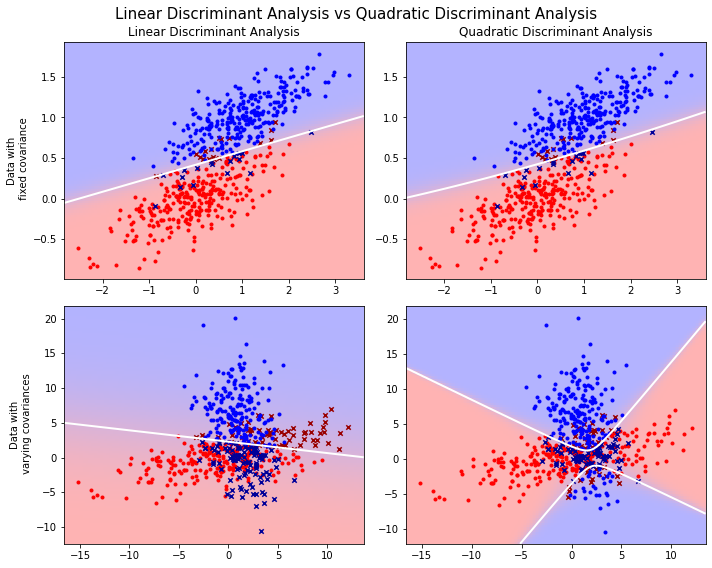

In [53]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    return splot


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

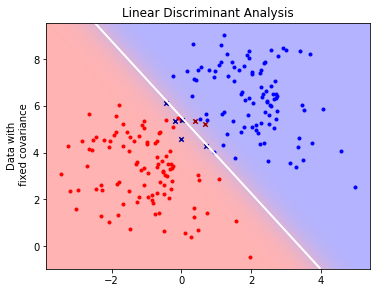

In [54]:

%matplotlib inline

plt.figure(figsize=(10, 8), facecolor='white')
Xa=X1.values
#Xa = Xa.tolist()
ya = y1["y"].values
#ya = ya.tolist()
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(Xa, ya).predict(Xa)
splot = plot_data(lda, Xa, ya, y_pred, fig_index=1)
plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


Xa=X2.values
#Xa = Xa.tolist()
ya = y2["y"].values
#ya = ya.tolist()

In [ ]:
X = df1[["x1","x2"]].values
y = df1['y'].values
X,y
X[y==1].shape,X[y==0].shape


In [ ]:
mean_vectors = []
for cl in range(0,2):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl]))

In [ ]:
S_W = np.zeros((2,2))
for cl,mv in zip(range(0,2), mean_vectors):
    class_sc_mat = np.zeros((2,2))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(2,1), mv.reshape(2,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

In [ ]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((2,2))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(2,1) # make column vector
    overall_mean = overall_mean.reshape(2,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(2,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

In [ ]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(2,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

In [ ]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

In [ ]:
W = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print('Matrix W:\n', W.real)

In [ ]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

In [ ]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=y[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.3)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()